# Uganda and Omicron

## Covidex/Covilyce

In [44]:
import glob

In [65]:
UGANDA_DIR  = '/efs-who/data/yennie/plk-data/texts'
columns = ['file','text']
uganda_df = pd.DataFrame(columns=columns)

for txtf in glob.glob(f"{UGANDA_DIR}/*.txt"):
    with open(txtf, "r") as text_file:
        text = text_file.read()
        data = [[txtf, text]]
        one_df = pd.DataFrame(data, columns=columns)
        uganda_df = uganda_df.append(one_df, ignore_index=True)

In [66]:
def clean_transcriptions(t):
    """
        Cleans transcriptions by removing punctuation and digits, lowercasing,
        and replacing common misspellings or mis-transcriptions of COVID related
        words (astrazeneca, johnson, covax). Further, it combines certain
        tokens into one phrase (i.e., blood clot -> blood_clot)
        
        Note: This returns a string, not tokenized
    """
    text = str(t)
    
    # Lowercase
    text = text.lower()
    # Keep all alphanumeric characters (including digits)
    text = re.sub(r'[^\w\s]','',text)
    # Remove digits, keep only alphabet characters
    text = re.sub(r'\w*\d+\w*', '', text)
    # Remove multiple spaces in a row with one space
    text = re.sub(r'\s\s+', ' ', text)
    
    # Tokenize Johnson and Johnson and its variations
    text = re.sub(r'(johnson and johnson)|jnj', 'johnson_johnson', text)
    # Tokenize astrazeneca and its variations
    text = re.sub(r'(astra zeneca)|astrazenecas', 'astrazeneca', text)
    # Tokenize COVAX and its variations
    text = re.sub(r'corvex|kovacs|kovac', 'covax', text)
    # A mistake in the transcription
    text = re.sub(r'gon na', 'gonna', text)
    
    # Pre-doing some bad lemma things
    text = re.sub(r'suspension|suspending', 'suspend', text)
    text = re.sub(r'pausing', 'pause', text)
    text = re.sub(r'vaccination', 'vaccinate', text)
    text = re.sub(r'inoculation', 'inoculate', text)
    text = re.sub(r'pregnancy', 'pregnant', text)
    text = re.sub(r'miscarry', 'miscarriage', text)
    text = re.sub(r'vomiting', 'vomit', text)
    text = re.sub(r'nauseous', 'nausea', text)
    text = re.sub(r'received|receiving', 'receive', text)
    text = re.sub(r'inequitable', 'inequity', text)

    return text

In [67]:
uganda_df["clean_transcription"] = uganda_df.text.apply(clean_transcriptions)
uganda_df['date'] = uganda_df.file.str.extract('_(.{,10})')


In [68]:
uganda_df.head()

,file,text,clean_transcription,date
0,/efs-who/data/yennie/plk-data/texts/kampala.98...,--P1: They told him he had typhoid not malaria...,they told him he had typhoid not malaria i to...,2021-07-14
1,/efs-who/data/yennie/plk-data/texts/kampala.10...,[...]\nM1: Uganda has once again run out of th...,uganda has once again run out of the vaccine ...,2021-08-19
2,/efs-who/data/yennie/plk-data/texts/kampala.10...,M1: The heads of hospitals in different distri...,the heads of hospitals in different districts...,2021-09-16
3,/efs-who/data/yennie/plk-data/texts/kampala.10...,"--P1: At Busega round about, there are some po...",at busega round about there are some police o...,2021-08-16
4,/efs-who/data/yennie/plk-data/texts/kampala.10...,M1: The general public has been warned against...,the general public has been warned against mo...,2021-09-27


In [71]:
#add the column for the number of transcriptions per day
df_count = uganda_df.groupby("date").count().reset_index().drop(columns = ["file"], axis=1).rename(columns = {"text":"count_transcription"})
uganda_df = uganda_df.merge(df_count, on=["date"])
uganda_df = uganda_df.drop(columns = ['file', 'text', 'clean_transcription_y'], axis=1) 
uganda_df.head()

,clean_transcription_x,date,count_transcription
0,they told him he had typhoid not malaria i to...,2021-07-14,19
1,in the process of trying to secure the vaccin...,2021-07-14,19
2,the chairman of nyendo mukungwe in masaka cit...,2021-07-14,19
3,there are those who have made it a habit and ...,2021-07-14,19
4,inmates in kwania government prison tested po...,2021-07-14,19


In [149]:
#restrict dataset to ones including specific substrings
df_uganda = uganda_df.loc[uganda_df['clean_transcription_x'].str.contains("herbal treatment|herbal medicine|remedy|remedies|herbal drug|covidex|codivex|covilyce|covilyce-1|covylice|codivex|covylice", case=False)]
df_uganda.head()

,clean_transcription_x,date,count_transcription
16,a group of ugandan lawyers has taken nda to c...,2021-07-14,19
112,what final package do you leave for the liste...,2021-07-29,18
197,the president insisted that many of our peopl...,2021-07-31,14
224,talking about the corona my concern about thi...,2021-09-25,12
269,i have receive a message from a listener text...,2021-07-27,21


In [150]:
#number of words per clean transcription
df_uganda['word_count'] = df_uganda['clean_transcription_x'].str.split().str.len()
df_uganda.head()

,clean_transcription_x,date,count_transcription,word_count
16,a group of ugandan lawyers has taken nda to c...,2021-07-14,19,72
112,what final package do you leave for the liste...,2021-07-29,18,178
197,the president insisted that many of our peopl...,2021-07-31,14,150
224,talking about the corona my concern about thi...,2021-09-25,12,210
269,i have receive a message from a listener text...,2021-07-27,21,63


In [151]:
#restrict dataset to covid
df_uganda = df_uganda.loc[df_uganda['clean_transcription_x'].str.contains("coronavirus|covid|sars cov 2|corona virus|covid 19|cov 19|covid nineteen|corona|covid-19", case=False)]
df_uganda.head()

,clean_transcription_x,date,count_transcription,word_count
16,a group of ugandan lawyers has taken nda to c...,2021-07-14,19,72
197,the president insisted that many of our peopl...,2021-07-31,14,150
224,talking about the corona my concern about thi...,2021-09-25,12,210
269,i have receive a message from a listener text...,2021-07-27,21,63
406,do you have any medicine that helps with the ...,2021-07-28,26,157


In [152]:
#number of keywords per clean transcription
df_uganda['covidex'] = df_uganda.clean_transcription_x.str.count("covidex|codivex|codivex")
df_uganda['covilyce'] = df_uganda.clean_transcription_x.str.count("covilyce|covilyce-1|covylice")
df_uganda.head()

,clean_transcription_x,date,count_transcription,word_count,covidex,covilyce
16,a group of ugandan lawyers has taken nda to c...,2021-07-14,19,72,1,0
197,the president insisted that many of our peopl...,2021-07-31,14,150,1,0
224,talking about the corona my concern about thi...,2021-09-25,12,210,0,0
269,i have receive a message from a listener text...,2021-07-27,21,63,2,0
406,do you have any medicine that helps with the ...,2021-07-28,26,157,1,0


In [154]:
df_uganda.sum()

clean_transcription_x     a group of ugandan lawyers has taken nda to c...
date                     2021-07-142021-07-312021-09-252021-07-272021-0...
count_transcription                                                    256
word_count                                                            2959
covidex                                                                 22
covilyce                                                                 4
dtype: object

In [92]:
df_uganda = df_uganda.groupby('date').sum().reset_index()

# Normalized count
df_uganda["norm_count_covidex"] = df_uganda["covidex"]/df_uganda["word_count"]
df_uganda["norm_count_covilyce"] = df_uganda["covilyce"]/df_uganda["word_count"]

df_uganda.head()

,date,count_transcription,word_count,covidex,covilyce,norm_count_covidex,norm_count_covilyce
0,2021-07-09,15,128,3,0,0.023438,0.000000
1,2021-07-10,10,257,2,0,0.007782,0.000000
2,2021-07-12,9,283,1,0,0.003534,0.000000
3,2021-07-14,19,72,1,0,0.013889,0.000000
4,2021-07-15,28,333,1,3,0.003003,0.009009


In [93]:
df_uganda = df_uganda.set_index('date')
df_uganda.index = pd.to_datetime(df_uganda.index)
df_uganda = df_uganda.resample('D').sum()

In [107]:
uganda_dates = sorted(df_uganda.index)

covidex_vaccine_counts = df_uganda['norm_count_covidex'].rolling(7, min_periods=1, win_type='triang').sum()
covilyce_vaccine_counts = df_uganda['norm_count_covilyce'].rolling(7, min_periods=1, win_type='triang').sum()
covidex_vaccine_counts.name='Covidex'
covilyce_vaccine_counts.name = 'Covilyce'

# set the dates as index
# covidex_vaccine_counts.index=uganda_dates
# covilyce_vaccine_counts.index=uganda_dates

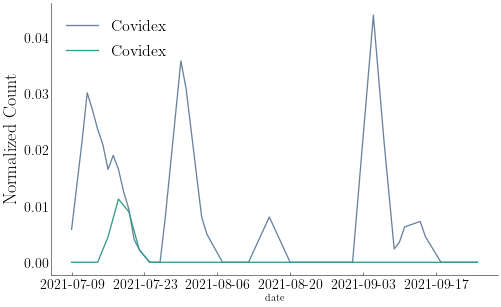

In [132]:
plt.figure(figsize=(8,5))
sns.lineplot(data=covidex_vaccine_counts.reset_index(), y='Covidex', x='date', label='Covidex',linewidth=1.3)
sns.lineplot(data=covilyce_vaccine_counts.reset_index(), y='Covilyce', x='date', label='Covidex',linewidth=1.3)


plt.ylabel('Normalized Count', size=18)

plt.legend(fontsize=16, loc='upper left')

ax = plt.gca()

# Remove spines
sns.despine(top=True, right=True)
# Remove all of the extra tick marks
ax.minorticks_off()
ax.tick_params(top=False, right=False)
# Remove the ticks on the y axis
plt.tick_params(left = False)

# print(ax.get_xticklabels())

# Set every  four dates on the x axis
# ax.set_xticks(np.arange(0, uganda_dates, 4))
ax.set_xticks(uganda_dates[::14])

# Larger tick values
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

plt.savefig('img/covidex_freq_plot.pdf', bbox_inches='tight') 
plt.show()


## Omicron

In [133]:
import os

In [134]:
def clean_transcriptions(t):
    """
        Cleans transcriptions by removing punctuation and digits, lowercasing,
        and replacing common misspellings or mis-transcriptions of COVID related
        words (astrazeneca, johnson, covax). Further, it combines certain
        tokens into one phrase (i.e., blood clot -> blood_clot)
        
        Note: This returns a string, not tokenized
    """
    text = str(t)
    
    # Lowercase
    text = text.lower()
    # Keep all alphanumeric characters (including digits)
    text = re.sub(r'[^\w\s]','',text)
    # Remove digits, keep only alphabet characters
    text = re.sub(r'\w*\d+\w*', '', text)
    # Remove multiple spaces in a row with one space
    text = re.sub(r'\s\s+', ' ', text)
    
    # Tokenize Johnson and Johnson and its variations
    text = re.sub(r'(johnson and johnson)|jnj', 'johnson_johnson', text)
    # Tokenize astrazeneca and its variations
    text = re.sub(r'(astra zeneca)|astrazenecas', 'astrazeneca', text)
    # Tokenize COVAX and its variations
    text = re.sub(r'corvex|kovacs|kovac', 'covax', text)
    # A mistake in the transcription
    text = re.sub(r'gon na', 'gonna', text)
    
    # Pre-doing some bad lemma things
    text = re.sub(r'suspension|suspending', 'suspend', text)
    text = re.sub(r'pausing', 'pause', text)
    text = re.sub(r'vaccination', 'vaccinate', text)
    text = re.sub(r'inoculation', 'inoculate', text)
    text = re.sub(r'pregnancy', 'pregnant', text)
    text = re.sub(r'miscarry', 'miscarriage', text)
    text = re.sub(r'vomiting', 'vomit', text)
    text = re.sub(r'nauseous', 'nausea', text)
    text = re.sub(r'received|receiving', 'receive', text)
    text = re.sub(r'inequitable', 'inequity', text)

    return text

In [136]:
omicron_transcriptions = []
TEXT_DIR = '/efs-who/data/yennie/texts-partitioned'
for city in os.listdir(TEXT_DIR):
    print(city)
    if city=='antalaha': continue
    
    city_dir = os.path.join(TEXT_DIR, city)
    for date in os.listdir(city_dir):
        # restrict dataset to October 31, 2021 to December 13, 2021
        if date > '2021-12-13':
            continue
            
        date_dir = os.path.join(city_dir, date)
        
        for txtf in os.listdir(date_dir):
            with open(os.path.join(date_dir, txtf), "r") as text_file:
                text = text_file.read()
                omicron_transcriptions.append({
                    "date": date,
                    "city": city,
                    "text": text
                })


cape_town
durban
antalaha
johannesburg
lagos
ibadan


In [137]:
omicron_df = pd.DataFrame(omicron_transcriptions)

In [138]:
# Clean the transcription by replacing (it is still a string) 
omicron_df["clean_transcription"] = omicron_df.text.apply(clean_transcriptions)

In [139]:
city2country = {"cape_town": "South Africa",
                "durban": "South Africa",
                "johannesburg": "South Africa",
                "lagos": "Nigeria",
                "ibadan": "Nigeria"
               }
omicron_df["country"] = omicron_df["city"].apply(lambda x: city2country[x])

In [140]:
# Locate words
df_omicron = omicron_df.loc[omicron_df['clean_transcription'].str.contains("omicron|omiclon|omikron|unicron|acron", case=False)]

# Set date as proper dtype
df_omicron.date = pd.to_datetime(df_omicron.date)

# Remove duplicates
df_omicron = df_omicron.drop_duplicates()


In [141]:
df_omicron['word_count'] = df_omicron['clean_transcription'].str.split().str.len()
df_omicron['omicron'] = df_omicron.clean_transcription.str.count("omicron|omiclon|omikron|unicron|acron")

# Count
df_omicron_count = df_omicron.groupby(['date']).sum().reset_index()

# Normalized count
df_omicron_count["norm_count_omicron"] = df_omicron_count["omicron"]/df_omicron_count["word_count"]
df_omicron_count.head()

,date,word_count,omicron,norm_count_omicron
0,2021-11-01,2937,5,0.001702
1,2021-11-02,2321,3,0.001293
2,2021-11-03,3405,6,0.001762
3,2021-11-04,732,1,0.001366
4,2021-11-05,974,2,0.002053


In [142]:
# Count
df_omicron_count_single = df_omicron.groupby(['date']).sum().reset_index()

# Normalized count
df_omicron_count_single["norm_count_omicron"] = df_omicron_count_single["omicron"]/df_omicron_count_single["word_count"]
df_omicron_count_single.head()

,date,word_count,omicron,norm_count_omicron
0,2021-11-01,2937,5,0.001702
1,2021-11-02,2321,3,0.001293
2,2021-11-03,3405,6,0.001762
3,2021-11-04,732,1,0.001366
4,2021-11-05,974,2,0.002053


In [143]:
omicron_dates = [t.date().strftime('%Y-%m-%d') for t in pd.date_range('2021-11-01', '2021-12-13').tolist()]

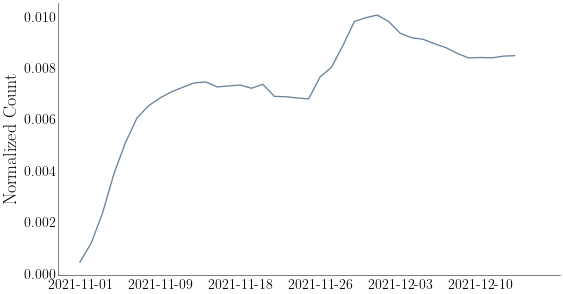

In [165]:
plt.figure(figsize=(9,5))
plt.plot(omicron_counts.index, omicron_counts.values, label='Omicron', linewidth=1.3)

plt.ylabel('Normalized Count', size=18)

# plt.legend(fontsize=16, loc='upper left')

ax = plt.gca()

# Remove spines
sns.despine(top=True, right=True)
# Remove all of the extra tick marks
ax.minorticks_off()
ax.tick_params(top=False, right=False)
# Remove the ticks on the y axis
plt.tick_params(left = False, bottom=False)

# print(ax.get_xticklabels())

# Set every  four dates on the x axis
ax.set_xticks(np.arange(0, len(omicron_dates), 7))
# ax.set_xticks(omicron_dates[::10])


# Larger tick values
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# plt.show()
plt.savefig('img/omicron_freq_plot.pdf', bbox_inches='tight') 


In [166]:
# SEPARATE BY COUNTRY

# Count
df_omicron_count = df_omicron.groupby(['date', 'country']).sum().reset_index()

# Normalized count
df_omicron_count["norm_count_omicron"] = df_omicron_count["omicron"]/df_omicron_count["word_count"]
df_omicron_count.head()

,date,country,word_count,omicron,norm_count_omicron
0,2021-11-01,Nigeria,1548,3,0.001938
1,2021-11-01,South Africa,1389,2,0.001440
2,2021-11-02,Nigeria,828,1,0.001208
3,2021-11-02,South Africa,1493,2,0.001340
4,2021-11-03,Nigeria,2684,4,0.001490


In [167]:
nigeria_vaccine_counts = df_omicron_count[df_omicron_count.country=="Nigeria"]
nigeria_vaccine_counts = pd.pivot_table(nigeria_vaccine_counts, index=["date"], values=["norm_count_omicron"])
nigeria_vaccine_counts = nigeria_vaccine_counts.rolling(7, min_periods=1, win_type='triang').sum()

southafrica_vaccine_counts = df_omicron_count[df_omicron_count.country=="South Africa"]
southafrica_vaccine_counts = pd.pivot_table(southafrica_vaccine_counts, index=["date"], values=["norm_count_omicron"])
southafrica_vaccine_counts = southafrica_vaccine_counts.rolling(7, min_periods=1, win_type='triang').sum()


In [168]:
len(nigeria_vaccine_counts), len(southafrica_vaccine_counts)

(32, 31)

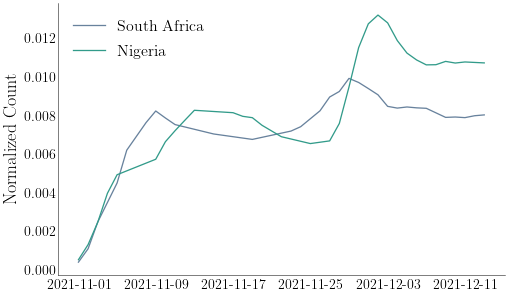

In [173]:
plt.figure(figsize=(8,5))
plt.plot(southafrica_vaccine_counts.index, southafrica_vaccine_counts.values, label='South Africa', linewidth=1.3)
plt.plot(nigeria_vaccine_counts.index, nigeria_vaccine_counts.values, label='Nigeria', linewidth=1.3)
plt.ylabel('Normalized Count', size=18)

plt.legend(fontsize=16, loc='upper left')

ax = plt.gca()

# Remove spines
sns.despine(top=True, right=True)
# Remove all of the extra tick marks
ax.minorticks_off()
ax.tick_params(top=False, right=False)
# Remove the ticks on the y axis
plt.tick_params(left = False, bottom=False)

# print(ax.get_xticklabels())

# Set every  four dates on the x axis
# ax.set_xticks(np.arange(0, len(omicron_dates), 7))
ax.set_xticks(omicron_dates[::8])

# Larger tick values
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# plt.show()
plt.savefig('img/omicron_freq_plot_disag_country.pdf', bbox_inches='tight') 


## Omicron x vaccine hesitancy

In [184]:
#further restrict dataset
df_omicron_vac = df_omicron.loc[df_omicron['clean_transcription'].str.contains("vaccine|vaccines|vaccina|jabs|jab|antivax|antivax|no-vax|no-vax|immunisation|vaccination|vaccin|vaccins|anti-vaccin|refus vaccin|inocul", case=False)]
df_omicron_vac.shape

(763, 7)

In [185]:
df_omicron_vac = df_omicron_vac.loc[df_omicron_vac['clean_transcription'].str.contains("not effective|effectiveness", case=False)]
df_omicron_vac.shape

(18, 7)

In [186]:
df_omicron_vac

,date,city,text,clean_transcription,country,word_count,omicron
1728,2021-12-11,durban,of real rush games be now on luter star your w...,of real rush games be now on luter star your w...,South Africa,705,1
5135,2021-12-10,durban,andthank youhe wasnews on former fmit's 02:00 ...,andthank youhe wasnews on former fmits im on t...,South Africa,531,1
7199,2021-12-06,johannesburg,at least mobile you get the power of a free fi...,at least mobile you get the power of a free fi...,South Africa,802,1
8627,2021-11-30,johannesburg,his foundation wait's your early breakfast wit...,his foundation waits your early breakfast with...,South Africa,768,1
8921,2021-11-30,johannesburg,his foundation wait's your early breakfast wit...,his foundation waits your early breakfast with...,South Africa,768,1
8930,2021-11-30,johannesburg,of a sudden a double g almost double that so n...,of a sudden a double g almost double that so n...,South Africa,821,1
9058,2021-11-30,johannesburg,policy on masks right now you have a national ...,policy on masks right now you have a national ...,South Africa,903,2
9167,2021-11-30,johannesburg,policy on masks right now you have a national ...,policy on masks right now you have a national ...,South Africa,906,2
9632,2021-11-29,johannesburg,at bush garden's christmas town rekindle the s...,at bush gardens christmas town rekindle the sp...,South Africa,670,1
10729,2021-11-09,johannesburg,because the question is can you ever really fu...,because the question is can you ever really fu...,South Africa,769,2


In [176]:
df_omicron_vac['transcription'] = 1

In [177]:
df_omicron_vac_count = df_omicron_vac.groupby('date').sum().reset_index()
df_omicron_vac_count

,date,word_count,omicron,transcription
0,2021-11-09,769,2,1
1,2021-11-29,670,1,1
2,2021-11-30,4166,7,5
3,2021-12-01,664,1,1
4,2021-12-06,802,1,1
5,2021-12-08,3089,4,4
6,2021-12-09,789,3,1
7,2021-12-10,1776,8,3
8,2021-12-11,705,1,1


No handles with labels found to put in legend.


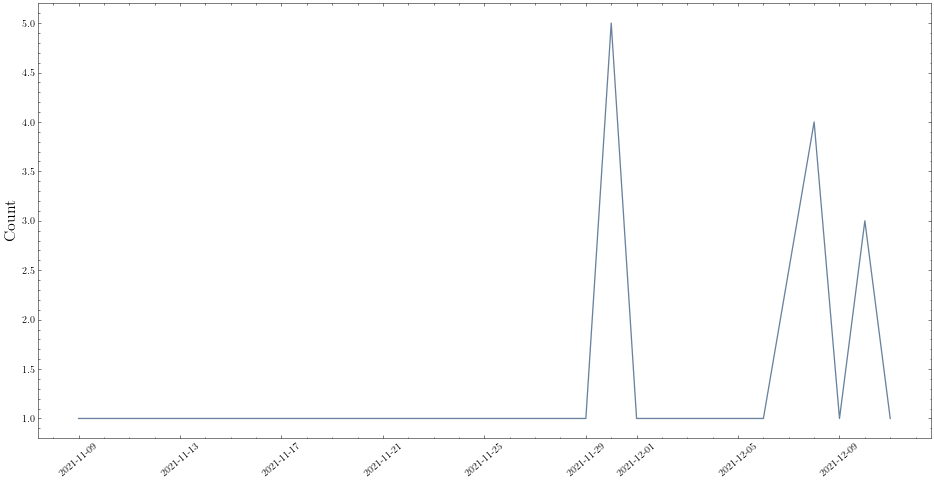

In [178]:
#plot - total number of transcriptions including a combination of relevant keywords per day
plt.figure(figsize = (16,8))
plt.plot(df_omicron_vac_count['date'], df_omicron_vac_count['transcription'], marker = '',
         linewidth = 1.3)
plt.ylabel('Count', size=16)
plt.xticks(rotation=40)
plt.legend()
plt.show()